# 네이버 뉴스기사 스크래핑

https://dsbook.tistory.com/250

2021/06/25 까지 잘되 는것을 확인함

네이버 뉴스 에서 접근이 안되는 에러가 발생
*  아래와 같이 에러가 발생

해결 방법은 header 를 설정 하는 것이다. 
     - 봇을 방지 하기 위함이라고 하는데, 비정상적인 접근을 막는다고 한다. 

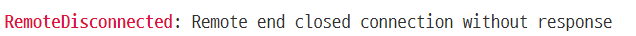

In [183]:
from bs4 import BeautifulSoup
import urllib.request
from urllib.parse import quote
import pandas as pd
import requests



def get_new(query, page_num = 10):
    news_df = pd.DataFrame(columns=("Title", "Link", "Press", "Datetime", "Article"))
    idx = 0 
    
    url_query = quote(query) # utf-8 로 인코딩
    url='https://search.naver.com/search.naver?where=news&sm=tab_jum&query=' + url_query
    headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.163 Safari/537.36'}
    
    for _ in range(0, page_num):

        search_url = urllib.request.urlopen(url).read()
        soup = BeautifulSoup(search_url, 'html.parser')

        links = soup.find_all('div', {'class':'info_group'})
        
        for link in links:
            try:  # 네이버 뉴스만을 가져와야 한다. 리스트가 1개짜리는 네이버 뉴스가 아니다.
                press = link.find('a').get_text()
                news_url = link.find_all('a',{'class':'info'})[1].get('href')
                
                news_link = requests.get(news_url, headers=headers)
                news_html = BeautifulSoup(news_link.text, 'html.parser')
                title = news_html.find('h3', {'id':'articleTitle'}).get_text()
                datetime = news_html.find('span', {'class':'t11'}).get_text()
                article = news_html.find('div', {'id':'articleBodyContents'}).get_text()
                article = article.replace('\n', '')

                news_df.loc[idx] = [title, news_url, press, datetime, article]
                idx += 1
                print("#", end="")

            except:
                continue
        try : 
            next = soup.find('a', {'class':'btn_next'}).get('href')
            url = 'https://search.naver.com/search.naver' + next
            print(_)
        except:
            break
            
    return news_df

In [184]:
get_new('인공지능')

#########0
########1
######2
####3
#####4
#####5
#####6
###7
######8
######9


,Title,Link,Press,Datetime,Article
0,"""UNIST와 인공지능으로 산업현장 문제 해결했다""",https://news.naver.com/main/read.nhn?mode=LSD&...,뉴시스,2021.06.25. 오후 4:01,"인공지능혁신파크, 'AI 노바투스 아카데미아' 수료식 개최1기 교육생 36명 수료…..."
1,"창원시, ‘인공지능 추진협의회’ 출범",https://news.naver.com/main/read.nhn?mode=LSD&...,프레시안,2021.06.24. 오후 6:05,‘창원시 인공지능 종합계획’ 수립을 위한 첫 회의 가져창원시는 24일 시민홀에서 A...
2,"알체라, 제1회 대한민국 인공지능 산업대상 '대상' 수상",https://news.naver.com/main/read.nhn?mode=LSD&...,한국경제TV,2021.06.24. 오후 3:47,"[한국경제TV 유오성 기자]사진 : (좌) 과학기술정보통신부 송경희 국장, (우) ..."
3,“비트코인 투자 인공지능으로”… 투자금 190억 챙긴 일당에 징역형,https://news.naver.com/main/read.nhn?mode=LSD&...,세계일보,2021.06.24. 오후 9:02,비트코인에 투자하면 인공지능(AI)으로 거래해 고수익을 얻을 수 있다고 속여 ...
4,"'인공지능·증강현실 한 번에' 조선대, 첨단기술 활용공간 개소",https://news.naver.com/main/read.nhn?mode=LSD&...,뉴시스,2021.06.24. 오후 3:33,IT융합대학에 'CU INNO SPACE' 오픈창조공간·혁신공간·교육 공간 조성[...
5,"신일전자, ‘인공지능 자동 제습기’ 출시",https://news.naver.com/main/read.nhn?mode=LSD&...,파이낸셜뉴스,2021.06.25. 오후 3:15,‘인공지능 자동 제습기(6리터)’. 신일전자 제공. [파이낸셜뉴스]종합가전 기업 신...
6,"창원시, 제조AI 창원 위한 ‘인공지능 추진협의회’ 공식출범",https://news.naver.com/main/read.nhn?mode=LSD&...,부산일보,2021.06.25. 오전 10:01,"AI, 빅데이터 분야 전문가 모여 ‘인공지능 종합계획’ 수립 위한 브레인스토밍창원시..."
7,인공지능이 만든 문장·번역·이미지 오류 자동으로 고친다,https://news.naver.com/main/read.nhn?mode=LSD&...,아시아경제,2021.06.25. 오전 10:00,"최재색 KAIST 교수팀, 딥러닝 생성모델 오류 수정 기술 개발한국과학기술원(KAI..."
8,"선진 5개국 특허청장들, 인공지능 등 첨단기술 대응 로드맵 승인",https://news.naver.com/main/read.nhn?mode=LSD&...,연합뉴스,2021.06.24. 오전 9:09,특허심사 통일화 추진·출원인 편의 향상 기대…IP5 청장회의 IP5 청장회의 참석한...
9,"""습도 조절 알아서""…신일, '인공지능 자동 제습기' 출시",https://news.naver.com/main/read.nhn?mode=LSD&...,이데일리,2021.06.25. 오후 4:14,자체 내부 건조 기능으로 곰팡이 방지신일전자 ‘인공지능 자동 제습기’[이데일리 김호...


In [185]:
query=input('검색 내용')
get_new(query)

검색 내용고양이
#######0
#######1
####2
########3
#######4
#####5
######6
##7
####8
######9


,Title,Link,Press,Datetime,Article
0,'고양이 먹이 골라요',https://news.naver.com/main/read.nhn?mode=LSD&...,뉴시스,2021.06.25. 오후 4:18,[서울=뉴시스]최진석 기자 = 25일 서울 강남구 세텍에서 열린 2021 케이캣페어...
1,'고양이 뭘 먹일까',https://news.naver.com/main/read.nhn?mode=LSD&...,뉴스1,2021.06.25. 오후 3:45,(서울=뉴스1) 김명섭 기자 = 애묘인들이 25일 서울 강남구 세텍에서 열린 케이캣...
2,'고양이를 위한 장난감',https://news.naver.com/main/read.nhn?mode=LSD&...,뉴시스,2021.06.25. 오후 4:18,[서울=뉴시스]최진석 기자 = 25일 서울 강남구 세텍에서 열린 2021 케이캣페어...
3,'다양한 모양의 고양이 이동장',https://news.naver.com/main/read.nhn?mode=LSD&...,뉴시스,2021.06.25. 오후 4:18,[서울=뉴시스]최진석 기자 = 25일 서울 강남구 세텍에서 열린 2021 케이캣페어...
4,'고양이 용품 보고 가세요',https://news.naver.com/main/read.nhn?mode=LSD&...,뉴스1,2021.06.25. 오후 2:12,(서울=뉴스1) 김명섭 기자 = 애묘인들이 25일 서울 강남구 세텍에서 열린 케이캣...
5,"고양이를 위한 박람회, 케이캣페어",https://news.naver.com/main/read.nhn?mode=LSD&...,뉴스1,2021.06.25. 오후 3:45,(서울=뉴스1) 김명섭 기자 = 애묘인들이 25일 서울 강남구 세텍에서 열린 케이캣...
6,고양이 장난감 고르는 애묘인들,https://news.naver.com/main/read.nhn?mode=LSD&...,뉴스1,2021.06.25. 오후 2:10,(서울=뉴스1) 김명섭 기자 = 애묘인들이 25일 서울 강남구 세텍에서 열린 케이캣...
7,[시가 있는 휴일] ‘고양이에게’ 중에서 앨저넌 찰스 스윈번,https://news.naver.com/main/read.nhn?mode=LSD&...,국민일보,2021.06.24. 오후 8:32,"당당하고, 다정하고, 거만한 친구,황공하게도내 옆에 앉아영롱한 눈으로 찬란히 웃어 ..."
8,"""고양이 스트레스 해소에 도움"" 원헬스포펫, 캣닢체인지 출시",https://news.naver.com/main/read.nhn?mode=LSD&...,뉴스1,2021.06.24. 오후 5:05,캣닢체인지 (원헬스포펫 제공) © 뉴스1(서울=뉴스1) 최서윤 기자 = 반려동물용품...
9,“고양이 죽이면 징역 2년” 인쇄물… 구청장 경고 아닌 캣맘의 사칭?,https://news.naver.com/main/read.nhn?mode=LSD&...,머니S언론사 선정,2021.06.24. 오후 7:04,한 캣맘이 구청장을 사칭한 인쇄물(오른쪽)을 주택가에 부착했다는 의혹이 제기됐다. ...
